# Image recognition for Singaporean food

In [1]:
%matplotlib inline

In [2]:
path = "data/SGFoodData/"

In [3]:
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from importlib import reload

In [4]:
import utils; reload(utils)
from utils import plots

Using Theano backend.


In [5]:
batch_size=30

In [6]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## Instantiating VGG16, fitting to data and finetuning

In [7]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '9840' (I am process '10532')


Found 388 images belonging to 4 classes.
Found 15 images belonging to 4 classes.
Epoch 1/1
388/388 [==============================] - 223s - loss: 1.4549 - acc: 0.5644 - val_loss: 0.5783 - val_acc: 0.8000


## Testing against the validation set

Found 388 images belonging to 4 classes.
Found 15 images belonging to 4 classes.
Class Legend
Class 1: Bak Kut Teh [1, 0, 0, 0]
Class 2: Chilli Crab [0, 1, 0, 0]
Class 3: Prata [0, 0, 1, 0]
Class 4: Satay [0, 0, 0, 1]


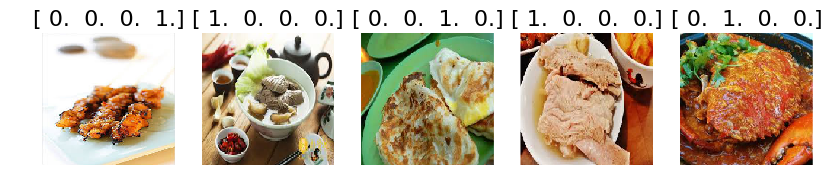

In [8]:
batch_size = 5
from keras.preprocessing import image
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

print("Class Legend")
print("Class 1: Bak Kut Teh [1, 0, 0, 0]")
print("Class 2: Chilli Crab [0, 1, 0, 0]")
print("Class 3: Prata [0, 0, 1, 0]")
print("Class 4: Satay [0, 0, 0, 1]")

# GROUND TRUTH
plots(imgs, titles=labels)